In [3]:
%pip install pandas
%pip install matplotlib seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------- ------------------------------ 1.8/8.1 MB 12.6 MB/s eta 0:00:01
   ---------------------------------------  8.1/8.1 MB 25.1 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 21.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 44.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 7.0/7.0 MB 48.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Matplotlib is building the font cache; this may take a moment.


In [9]:
# Load financial statements
income = pd.read_csv("../data/raw/income_statement.csv")
balance = pd.read_csv("../data/raw/balance_sheet.csv")
cash = pd.read_csv("../data/raw/cash_flow.csv")

# Preview data
income.head()

,report_date,Revenue,Cost_of_Revenue,Gross_Profit,Operating_Expenses,Operating_Income,Net_Income
0,2021-09-30,365817,212981,152836,43887,108949,94680
1,2022-09-30,394328,223546,170782,51345,119437,99803
2,2023-09-30,383285,214137,169148,54832,114316,96995
3,2024-09-30,401200,219800,181400,56200,125200,102500


In [10]:
# Convert report_date to datetime
income["report_date"] = pd.to_datetime(income["report_date"])
balance["report_date"] = pd.to_datetime(balance["report_date"])
cash["report_date"] = pd.to_datetime(cash["report_date"])

# Sort by date
income = income.sort_values("report_date")
balance = balance.sort_values("report_date")
cash = cash.sort_values("report_date")

income.info()


<class 'pandas.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   report_date         4 non-null      datetime64[us]
 1   Revenue             4 non-null      int64         
 2   Cost_of_Revenue     4 non-null      int64         
 3   Gross_Profit        4 non-null      int64         
 4   Operating_Expenses  4 non-null      int64         
 5   Operating_Income    4 non-null      int64         
 6   Net_Income          4 non-null      int64         
dtypes: datetime64[us](1), int64(6)
memory usage: 352.0 bytes


In [11]:
# Profitability metrics
income["gross_margin"] = income["Gross_Profit"] / income["Revenue"]
income["net_margin"] = income["Net_Income"] / income["Revenue"]

# Revenue growth (YoY)
income["revenue_growth_pct"] = income["Revenue"].pct_change() * 100

income[[
    "report_date",
    "Revenue",
    "gross_margin",
    "net_margin",
    "revenue_growth_pct"
]]


,report_date,Revenue,gross_margin,net_margin,revenue_growth_pct
0,2021-09-30,365817,0.417794,0.258818,NaN
1,2022-09-30,394328,0.433096,0.253096,7.793788
2,2023-09-30,383285,0.441311,0.253062,-2.800461
3,2024-09-30,401200,0.452144,0.255484,4.674068


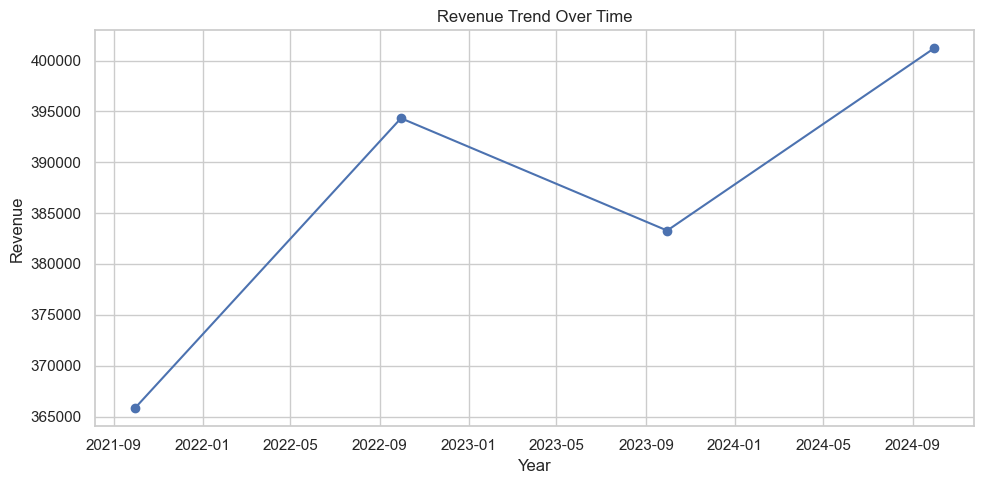

In [12]:
plt.figure(figsize=(10,5))
plt.plot(income["report_date"], income["Revenue"], marker="o")
plt.title("Revenue Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.tight_layout()

# Save chart
plt.savefig("../visuals/revenue_trend.png")
plt.show()


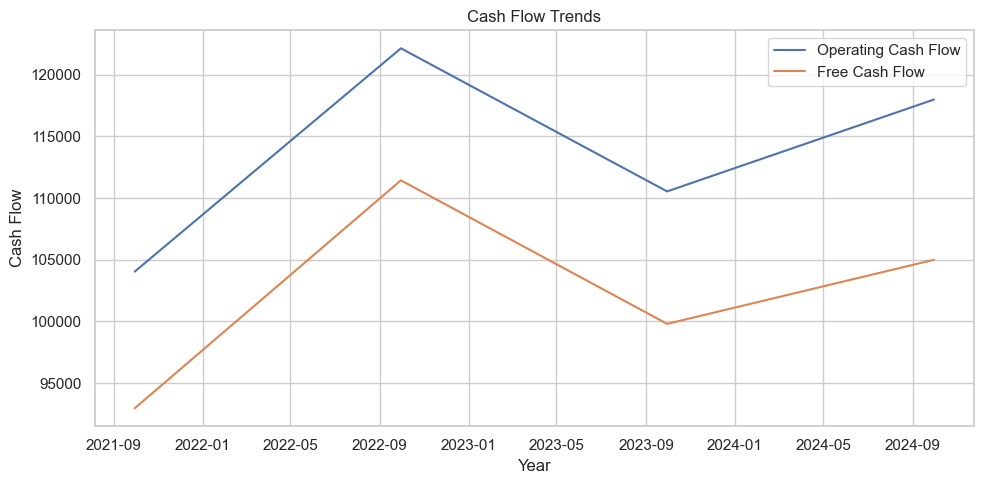

In [13]:
plt.figure(figsize=(10,5))
plt.plot(cash["report_date"], cash["Operating_Cash_Flow"], label="Operating Cash Flow")
plt.plot(cash["report_date"], cash["Free_Cash_Flow"], label="Free Cash Flow")
plt.title("Cash Flow Trends")
plt.xlabel("Year")
plt.ylabel("Cash Flow")
plt.legend()
plt.tight_layout()

plt.show()
